# EV Penetration Data

## 1 Load data

In [3]:
import pandas as pd
data = pd.read_excel("data/ev_penetration.xlsx")
data

,year,population,ev population,penetration,bev%
0,2016,184000000,1014000,0.005511,NaN
1,2017,217000000,1530000,0.007051,NaN
2,2018,231000000,2610000,0.011299,NaN
3,2019,260000000,3810000,0.014654,0.8120
4,2020,281000000,4920000,0.017509,0.8100
5,2021,302000000,7832160,0.025934,0.8160
6,2022,319000000,13100000,0.041066,0.7980
7,2023,336000000,20410000,0.060744,0.7600
8,2024,353000000,31400000,0.088952,0.7034


## 2 Plot

C:\Users\Ricky Chen\AppData\Local\Temp\ipykernel_11756\2779099743.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  set2_colors = cm.get_cmap('Set2')


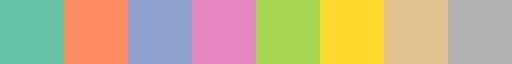

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 800

import matplotlib.cm as cm
set2_colors = cm.get_cmap('Set2')
set2_colors

In [ ]:
data['phev%'] = 1 - data['bev%']
stacked_data = data.fillna(method='backfill')
stacked_data

C:\Users\Ricky Chen\AppData\Local\Temp\ipykernel_11756\3519962104.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stacked_data = data.fillna(method='backfill')


,year,population,ev population,penetration,bev%,bev penetration,phev%
0,2016,184000000,1014000,0.005511,0.8120,0.011899,0.1880
1,2017,217000000,1530000,0.007051,0.8120,0.011899,0.1880
2,2018,231000000,2610000,0.011299,0.8120,0.011899,0.1880
3,2019,260000000,3810000,0.014654,0.8120,0.011899,0.1880
4,2020,281000000,4920000,0.017509,0.8100,0.014182,0.1900
5,2021,302000000,7832160,0.025934,0.8160,0.021162,0.1840
6,2022,319000000,13100000,0.041066,0.7980,0.032771,0.2020
7,2023,336000000,20410000,0.060744,0.7600,0.046165,0.2400
8,2024,353000000,31400000,0.088952,0.7034,0.062569,0.2966


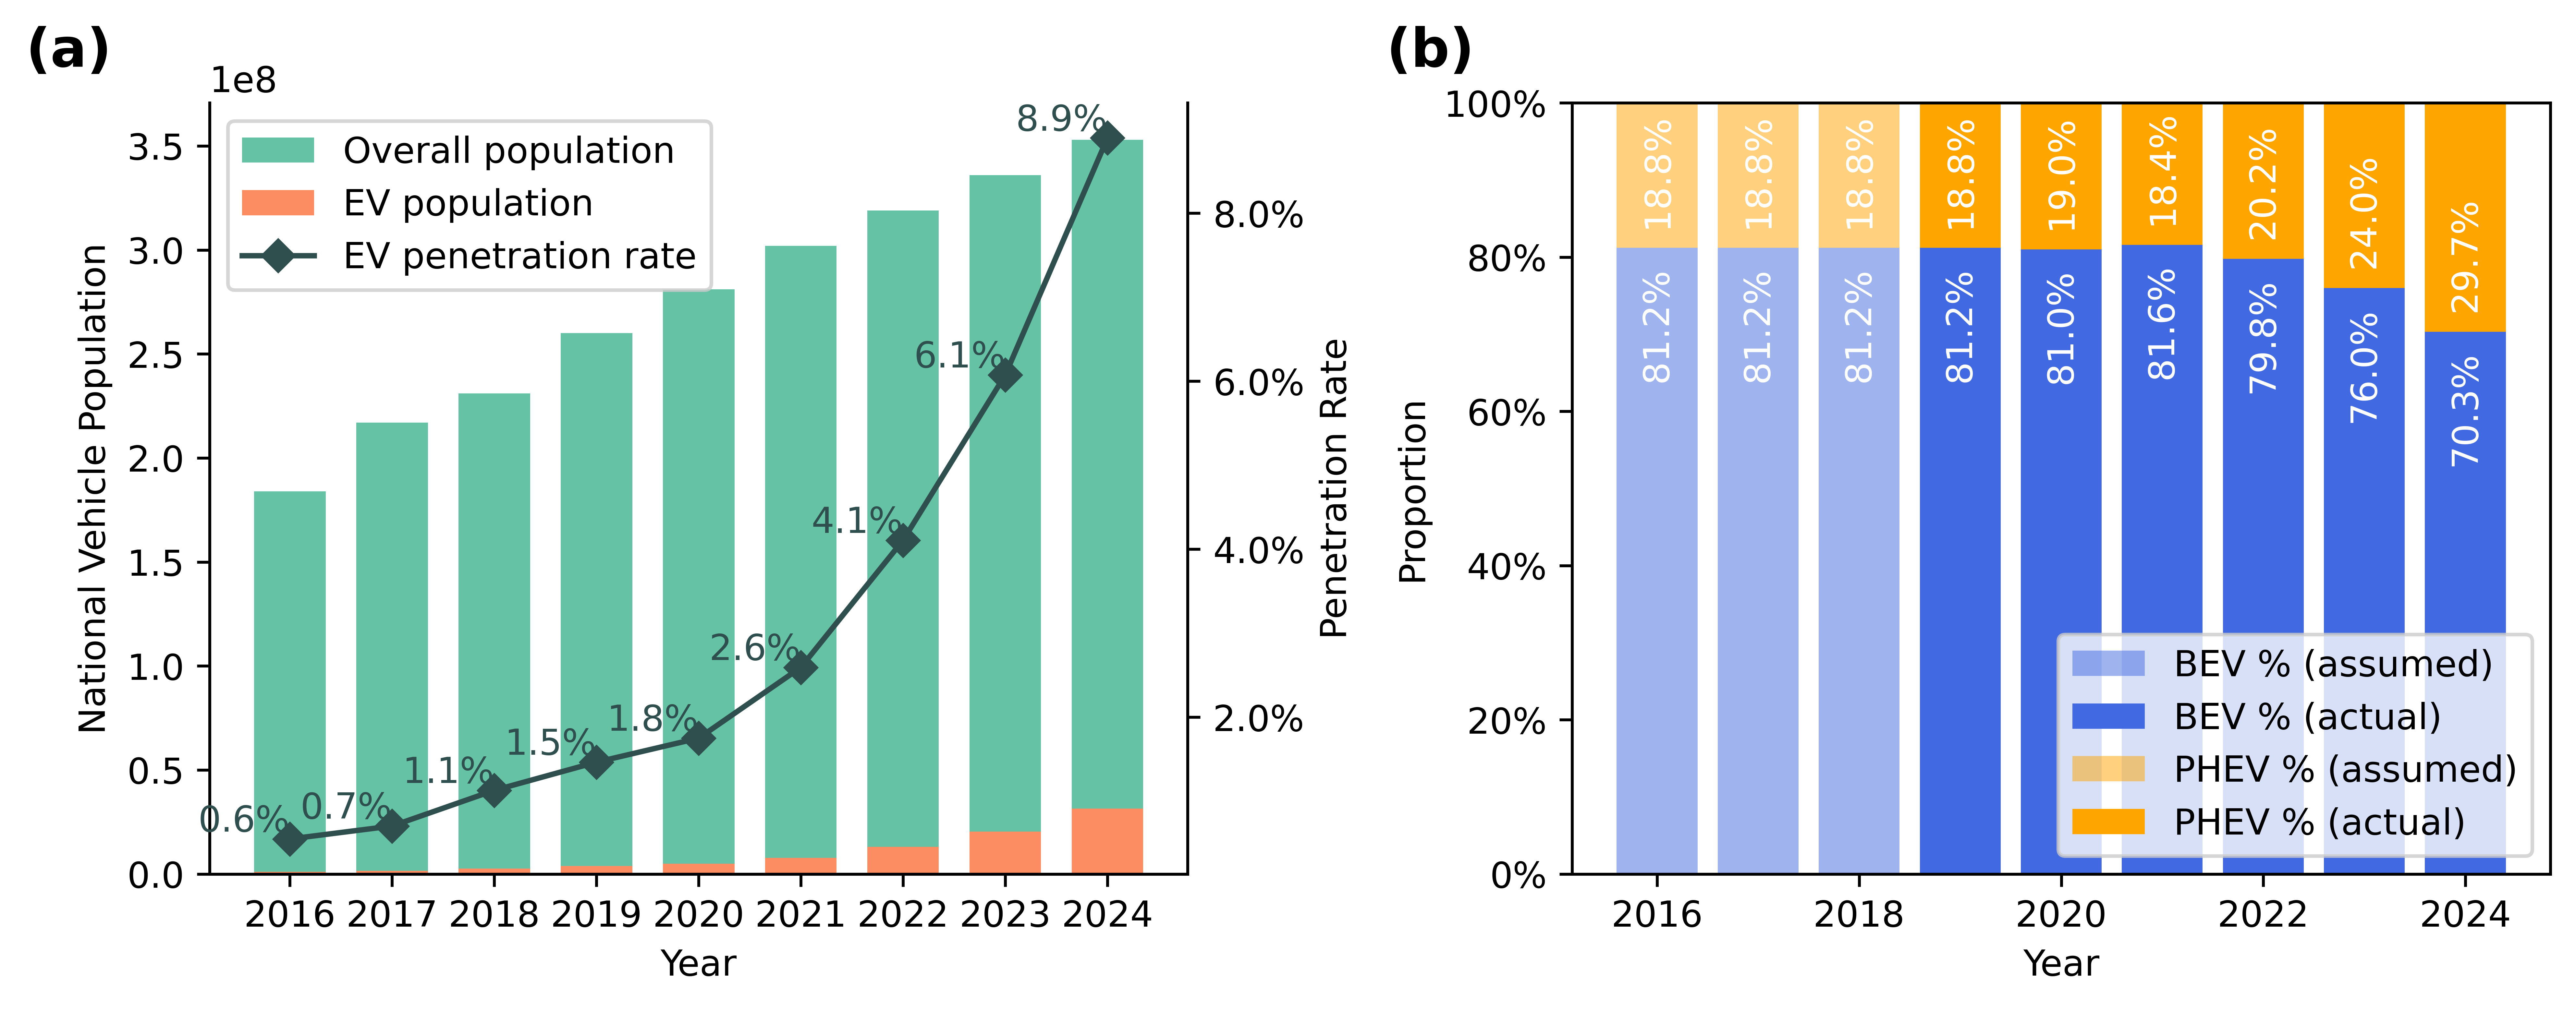

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# Add panel labels in Nature style (top-left corner, bold)
ax1.text(-0.1, 1.1, '(a)', transform=ax1.transAxes, 
         fontsize=15, fontweight='bold', va='top', ha='right')
ax2.text(-0.1, 1.1, '(b)', transform=ax2.transAxes, 
         fontsize=15, fontweight='bold', va='top', ha='right')

## First subplot (left) - Vehicle populations and penetration rate
# Create twin axes for the first subplot
ax1_twin = ax1.twinx()

# Plotting the bar chart for vehicle populations
x = np.arange(len(data['year']))
width = 0.7
color1 = set2_colors(0)
color2 = set2_colors(1)
ax1.bar(x, data['population'], width, label='Overall population', color=color1)
ax1.bar(x, data['ev population'], width, label='EV population', color=color2)
ax1.set_xticks(x, data['year'])
ax1.set_xlabel('Year')
ax1.set_ylabel('National Vehicle Population')

# Plotting the line chart for EV penetration rate
line, = ax1_twin.plot(x, data['penetration'], 'D-', color='darkslategrey', label='EV penetration rate')
ax1_twin.set_ylabel('Penetration Rate')
for i, v in enumerate(data['penetration']):
    ax1_twin.text(i, v, f'{v * 100:.1f}%', color='darkslategrey', ha='right', va='bottom')

# Adding legends and formatting
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1_twin.legend(lines + lines2, labels + labels2, loc='upper left')
ax1_twin.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
ax1.spines['top'].set_visible(False)
ax1_twin.spines['top'].set_visible(False)

## Second subplot (right) - BEV/PHEV proportion
years = stacked_data['year']
bev_prop = stacked_data['bev%']
phev_prop = stacked_data['phev%']

# Separate data into pre-2019 (hypothetical) and 2019-onwards (actual)
pre_2019_mask = years < 2019

# Plot pre-2019 data (hypothetical, alpha=0.6)
bev_bars_pre = ax2.bar(years[pre_2019_mask], bev_prop[pre_2019_mask], 
       label='BEV % (assumed)', color='royalblue', alpha=0.5)
phev_bars_pre = ax2.bar(years[pre_2019_mask], phev_prop[pre_2019_mask], 
       bottom=bev_prop[pre_2019_mask], 
       label='PHEV % (assumed)', color='orange', alpha=0.5)

# Plot 2019-onwards data (actual, alpha=1.0)
bev_bars_post = ax2.bar(years[~pre_2019_mask], bev_prop[~pre_2019_mask], 
       label='BEV % (actual)', color='royalblue')
phev_bars_post = ax2.bar(years[~pre_2019_mask], phev_prop[~pre_2019_mask], 
       bottom=bev_prop[~pre_2019_mask], 
       label='PHEV % (actual)', color='orange')

# Add annotations for each bar segment
def add_annotations(bars, bottom_bars=None):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        # If there's bottom bars (for stacked segments), use their heights as offset
        y_offset = bottom_bars[i].get_height() if bottom_bars else 0
        # Calculate center position of each bar segment
        y_pos = y_offset + 0.1 if y_offset else y_offset + height - 0.1
        # Skip annotation if value is too small
        if height < 0.05:  # 5% threshold
            continue
        ax2.text(bar.get_x() + bar.get_width()/2, y_pos,
                f'{height*100:.1f}%', 
                ha='center', va='center', color='white', fontsize=10, rotation=90)

# Annotate pre-2019 bars
add_annotations(bev_bars_pre)
add_annotations(phev_bars_pre, bev_bars_pre)

# Annotate post-2019 bars
add_annotations(bev_bars_post)
add_annotations(phev_bars_post, bev_bars_post)

ax2.set_xlabel('Year')
ax2.set_ylabel('Proportion')
ax2.set_ylim(0, 1)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

# Custom legend to group hypothetical and actual data
handles, labels = ax2.get_legend_handles_labels()
handles = [handles[0], handles[2], handles[1], handles[3]]
labels = [labels[0], labels[2], labels[1], labels[3]]
ax2.legend(handles, labels, loc='lower right')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Save the figure if needed
fig.savefig('figures/ev penetration.jpg', bbox_inches='tight', dpi=1000)